## Ejercicios 2 (Introducción)

In [2]:
%autosave 0
import pandas as pd
import plotnine
ruta = 'datos/tips.csv'
propinas = pd.read_csv(ruta)

Autosave disabled


#### 1. Calcula los promedios de cuenta dependiendo del día de la semana

In [3]:
propinas.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [4]:
propinas.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

#### 2. Haz una gráfica de caja y brazos del tamaño de cuenta según día de la semana

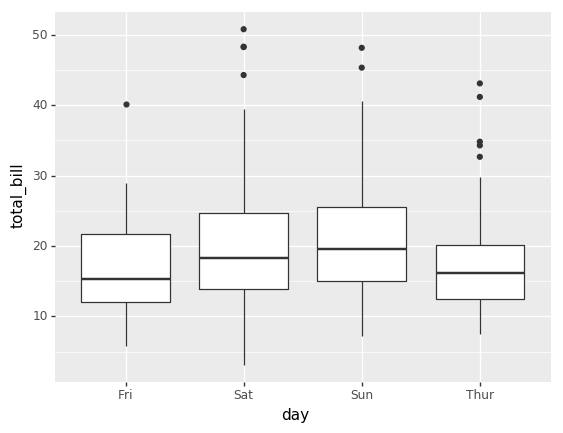

<ggplot: (-9223372029298138887)>

In [5]:
from plotnine import *
(ggplot(propinas, aes('day', 'total_bill')) +
    geom_boxplot())

#### 3. En tu gráfica anterior, asegúrate que los días están ordenados apropiadamente

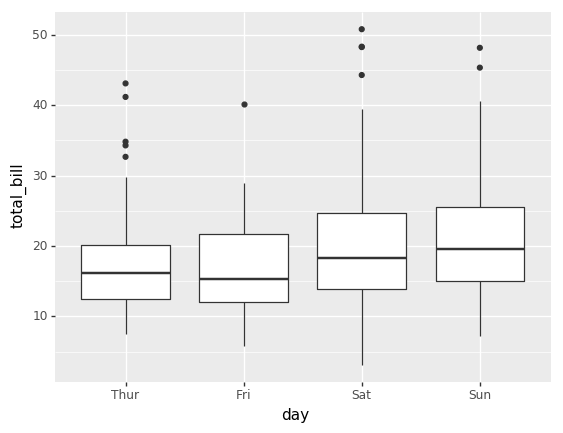

<ggplot: (-9223372029298086354)>

In [6]:
propinas['day'] = pd.Categorical(propinas['day'], categories = ['Thur','Fri','Sat','Sun'])
(ggplot(propinas, aes('day', 'total_bill')) +
    geom_boxplot())

#### 4. Calcula mediana y percentiles 10 y 90 de cuenta total y propina por cada dia de la semana 

Adicionalmente, calcula con cuántos datos se calcula cada una de estas estadísticas

In [7]:
tabla_dia = propinas[['total_bill', 'tip','day']].groupby('day').quantile([0.10, 0.5, 0.90])
tabla_dia

total_bill    tip
day                        
Thur 0.1      10.096  1.500
     0.5      16.200  2.305
     0.9      28.316  4.920
Fri  0.1       9.788  1.500
     0.5      15.380  3.000
     0.9      27.618  4.060
Sat  0.1      10.920  1.462
     0.5      18.240  2.750
     0.9      31.894  4.802
Sun  0.1      10.335  1.835
     0.5      19.630  3.150
     0.9      33.765  5.035

In [8]:
# conteo
propinas[['total_bill', 'tip','day']].groupby('day').count()

,total_bill,tip
day,,
Thur,62,62
Fri,19,19
Sat,87,87
Sun,76,76


#### 5. Pivotea la tabla anterior para obtener una tabla con cuantiles en columnas y días en renglones

Pregunta: cómo se hace para que los días estén en las columnas y viceversa

In [9]:
tabla_dia_ancha = tabla_dia.unstack(1)
tabla_dia_ancha

total_bill                   tip              
            0.1    0.5     0.9    0.1    0.5    0.9
day                                                
Thur     10.096  16.20  28.316  1.500  2.305  4.920
Fri       9.788  15.38  27.618  1.500  3.000  4.060
Sat      10.920  18.24  31.894  1.462  2.750  4.802
Sun      10.335  19.63  33.765  1.835  3.150  5.035

#### 6. En la tabla anterior, extrae los datos de propinas

In [10]:
tabla_tip = tabla_dia_ancha['tip']
tabla_tip

,0.1,0.5,0.9
day,,,
Thur,1.500,2.305,4.920
Fri,1.500,3.000,4.060
Sat,1.462,2.750,4.802
Sun,1.835,3.150,5.035


#### 7. Grafica medianas (puntos) y rango de 10 a 90 de propinas para cada día de la semana

In [11]:
tabla_tip = tabla_tip.reset_index()
tabla_tip.columns = tabla_tip.columns.astype('str')
tabla_tip


,day,0.1,0.5,0.9
0,Thur,1.500,2.305,4.920
1,Fri,1.500,3.000,4.060
2,Sat,1.462,2.750,4.802
3,Sun,1.835,3.150,5.035


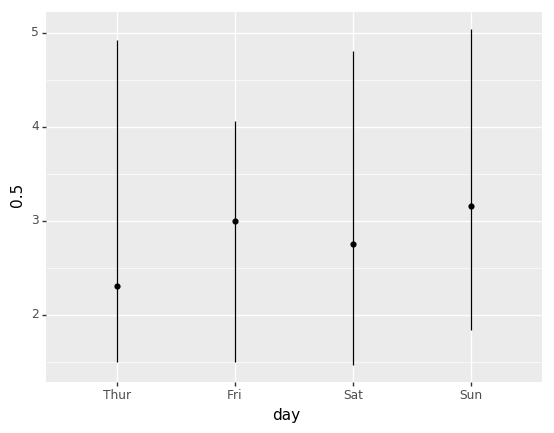

<ggplot: (-9223372029298139027)>

In [12]:
(ggplot(tabla_tip, aes('day', '0.5', ymin='0.1', ymax='0.9')) 
    + geom_point() + geom_linerange())